In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Task1

In [3]:
df = pd.read_csv('/content/locomotive_data.csv')
print(df.head())

                diag_trans_ts locomotive_id loco_type zone  has_ac_cab  \
0  2024-06-07 19:06:43.451753      WAP7-077      WAP7   NR           1   
1  2024-12-27 04:42:43.451753      WAP4-040      WAP4  ECR           0   
2  2023-10-06 01:12:43.451753      WAP5-060      WAP7  ECR           1   
3  2023-09-12 20:26:43.451753      WAG7-086      WAG7  ECR           0   
4  2024-07-09 05:42:43.451753     WAG9H-071      WAP4   CR           0   

       speed  temperature  vibration        load  energy_consumption  \
0  98.409797    85.660912   3.602139  105.629558          787.923212   
1  22.549538    60.944809   3.136164  110.874798         1154.603160   
2  46.936859    57.203280   1.485721   67.429760         1107.879091   
3  71.402630    58.977165   3.890576   47.697138          880.743130   
4  87.931286    74.986759   2.457389   20.427897         1059.764944   

   wheel_wear  brake_pressure  battery_voltage        mileage   humidity  \
0    8.580449        4.272105        26.306771

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   diag_trans_ts                 10000 non-null  object 
 1   locomotive_id                 10000 non-null  object 
 2   loco_type                     10000 non-null  object 
 3   zone                          10000 non-null  object 
 4   has_ac_cab                    10000 non-null  int64  
 5   speed                         10000 non-null  float64
 6   temperature                   10000 non-null  float64
 7   vibration                     10000 non-null  float64
 8   load                          10000 non-null  float64
 9   energy_consumption            10000 non-null  float64
 10  wheel_wear                    10000 non-null  float64
 11  brake_pressure                10000 non-null  float64
 12  battery_voltage               10000 non-null  float64
 13  mi

In [5]:
print(df.shape)

(10000, 19)


In [6]:
print(df.isnull().sum())

diag_trans_ts                   0
locomotive_id                   0
loco_type                       0
zone                            0
has_ac_cab                      0
speed                           0
temperature                     0
vibration                       0
load                            0
energy_consumption              0
wheel_wear                      0
brake_pressure                  0
battery_voltage                 0
mileage                         0
humidity                        0
external_temp                   0
wind_speed                      0
previous_maintenance_in_days    0
fault_code                      0
dtype: int64


In [7]:
df.isnull().sum()

,0
diag_trans_ts,0
locomotive_id,0
loco_type,0
zone,0
has_ac_cab,0
speed,0
temperature,0
vibration,0
load,0
energy_consumption,0


In [8]:
print(df.columns)

Index(['diag_trans_ts', 'locomotive_id', 'loco_type', 'zone', 'has_ac_cab',
       'speed', 'temperature', 'vibration', 'load', 'energy_consumption',
       'wheel_wear', 'brake_pressure', 'battery_voltage', 'mileage',
       'humidity', 'external_temp', 'wind_speed',
       'previous_maintenance_in_days', 'fault_code'],
      dtype='object')


In [9]:
print(df['fault_code'].unique())

['Overheating' 'Normal' 'Excessive Wheel Wear' 'Low Battery'
 'Excessive Vibration']


In [10]:
print(df['fault_code'].value_counts())

fault_code
Normal                  6571
Excessive Wheel Wear    1678
Overheating             1522
Low Battery              173
Excessive Vibration       56
Name: count, dtype: int64


In [11]:
X = df.drop('fault_code', axis=1)
y = df['fault_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 18)
X_test shape: (2000, 18)
y_train shape: (8000,)
y_test shape: (2000,)


# Task2

In [13]:
df.info()
display(df.describe())
df['fault_code'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   diag_trans_ts                 10000 non-null  object 
 1   locomotive_id                 10000 non-null  object 
 2   loco_type                     10000 non-null  object 
 3   zone                          10000 non-null  object 
 4   has_ac_cab                    10000 non-null  int64  
 5   speed                         10000 non-null  float64
 6   temperature                   10000 non-null  float64
 7   vibration                     10000 non-null  float64
 8   load                          10000 non-null  float64
 9   energy_consumption            10000 non-null  float64
 10  wheel_wear                    10000 non-null  float64
 11  brake_pressure                10000 non-null  float64
 12  battery_voltage               10000 non-null  float64
 13  mi

,has_ac_cab,speed,temperature,vibration,load,energy_consumption,wheel_wear,brake_pressure,battery_voltage,mileage,humidity,external_temp,wind_speed,previous_maintenance_in_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.536900,59.682205,69.773041,2.494831,65.494173,1000.580667,50.436212,4.256178,23.982702,255491.990571,50.235416,12.435059,40.083861,186.206300
std,0.498661,34.680205,14.939109,1.016083,31.813514,148.877443,28.693102,1.015676,1.989951,142102.281840,23.184994,18.767477,22.938557,103.068562
min,0.000000,0.018495,4.967233,-2.006155,10.032205,453.225407,0.006193,2.500613,15.141129,10090.990256,10.029325,-19.995447,0.001941,5.000000
25%,0.000000,28.871937,59.749474,1.800834,37.973773,902.203341,25.688964,3.384848,22.628388,133438.735201,30.150812,-3.808319,20.194619,99.000000
50%,1.000000,59.924105,69.804596,2.495966,65.819777,1000.315451,50.629147,4.256981,23.983317,256356.714748,50.185508,12.328802,39.982146,185.000000
75%,1.000000,89.477266,79.956473,3.175879,93.229024,1100.498954,75.621013,5.144795,25.317565,378880.451448,70.457084,28.906970,59.951629,275.000000
max,1.000000,119.989321,140.437035,6.459548,119.997713,1543.408765,99.985273,5.999951,31.651359,499981.346254,89.989227,44.993353,79.974705,365.000000


,count
fault_code,
Normal,6571
Excessive Wheel Wear,1678
Overheating,1522
Low Battery,173
Excessive Vibration,56


In [14]:
df.drop(columns=['diag_trans_ts'], inplace=True, errors='ignore')

In [15]:
categorical_features = ['loco_type', 'zone']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns
)

df_processed = preprocessor.fit_transform(df.drop('fault_code', axis=1))
X = df_processed
y = df['fault_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X after encoding:", X.shape)

Shape of X after encoding: (10000, 26)


In [16]:
X = df.drop('fault_code', axis=1)
y = df['fault_code']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [18]:
categorical_features = ['loco_type', 'zone']
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features = [f for f in numerical_features if f not in categorical_features + ['has_ac_cab', 'previous_maintenance_in_days']]
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_split=5, random_state=42))])
X = df.drop(['fault_code', 'locomotive_id'], axis=1)
y = df['fault_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipeline.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [20]:
rf = RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=200,
                       random_state=42)

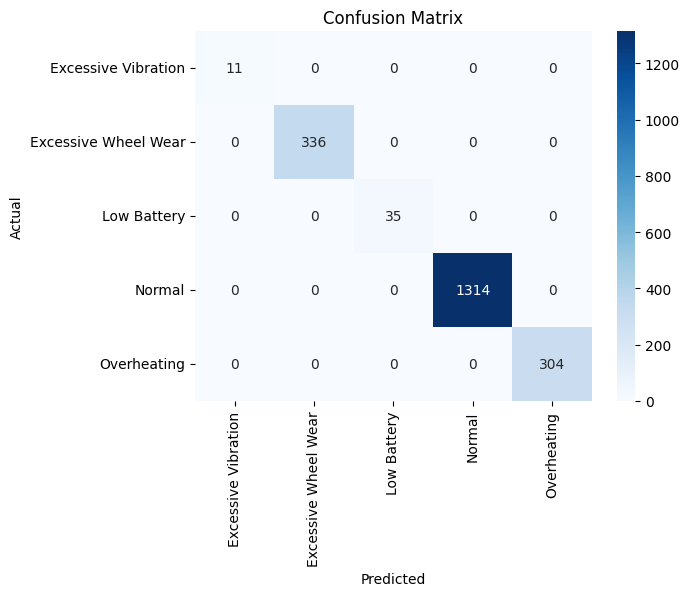

In [21]:
rf = RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

In [22]:
feature_names = X_train.columns
importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)


/tmp/ipython-input-23-3099448381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


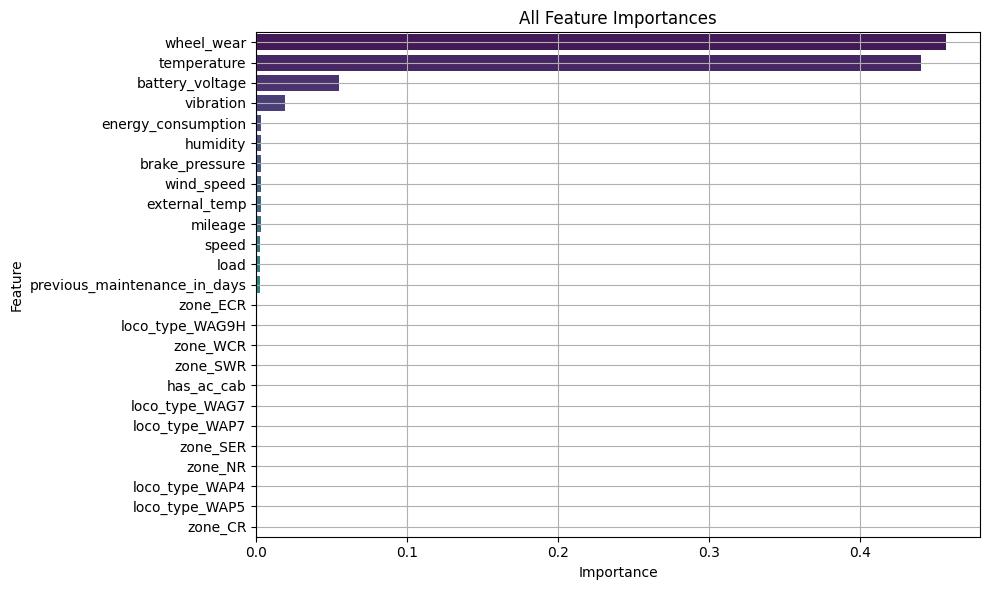

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('All Feature Importances')
plt.tight_layout()
plt.grid(True)
plt.show()

In [24]:
top5_df = importance_df.head(5)
top5_features = top5_df['Feature'].tolist()

/tmp/ipython-input-25-2824613341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top5_df, palette='rocket')


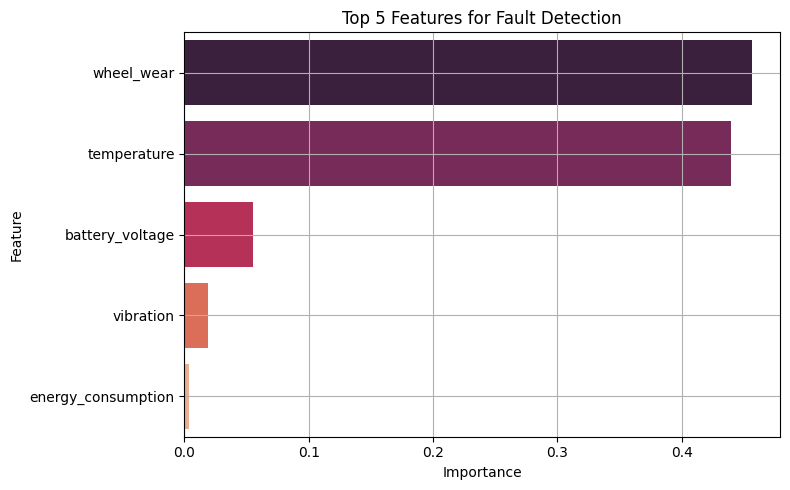

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=top5_df, palette='rocket')
plt.title('Top 5 Features for Fault Detection')
plt.tight_layout()
plt.grid(True)
plt.show()

In [26]:
X_top5 = X[top5_features]

In [27]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_top5, y, test_size=0.2, stratify=y, random_state=42)

In [28]:
rf_top5 = RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_split=5, random_state=42)
rf_top5.fit(X_train5, y_train5)

RandomForestClassifier(max_depth=12, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [29]:
y_pred5 = rf_top5.predict(X_test5)

In [30]:
print(classification_report(y_test5, y_pred5))

                      precision    recall  f1-score   support

 Excessive Vibration       1.00      1.00      1.00        11
Excessive Wheel Wear       1.00      1.00      1.00       336
         Low Battery       1.00      1.00      1.00        35
              Normal       1.00      1.00      1.00      1314
         Overheating       1.00      1.00      1.00       304

            accuracy                           1.00      2000
           macro avg       1.00      1.00      1.00      2000
        weighted avg       1.00      1.00      1.00      2000



In [31]:
print("All Features Accuracy:", rf.score(X_test, y_test))
print("Top 5 Features Accuracy:", rf_top5.score(X_test5, y_test5))

All Features Accuracy: 1.0
Top 5 Features Accuracy: 1.0


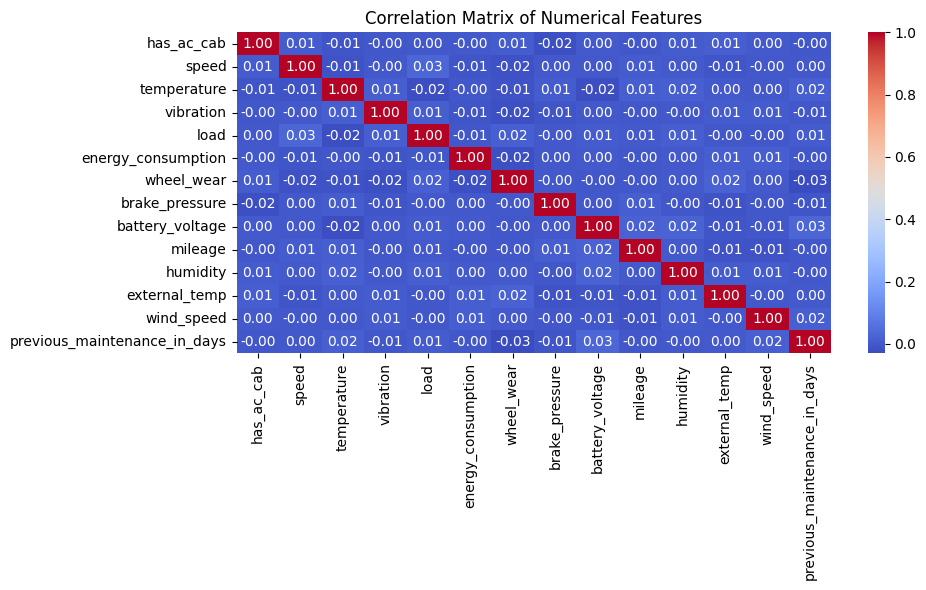

In [32]:
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

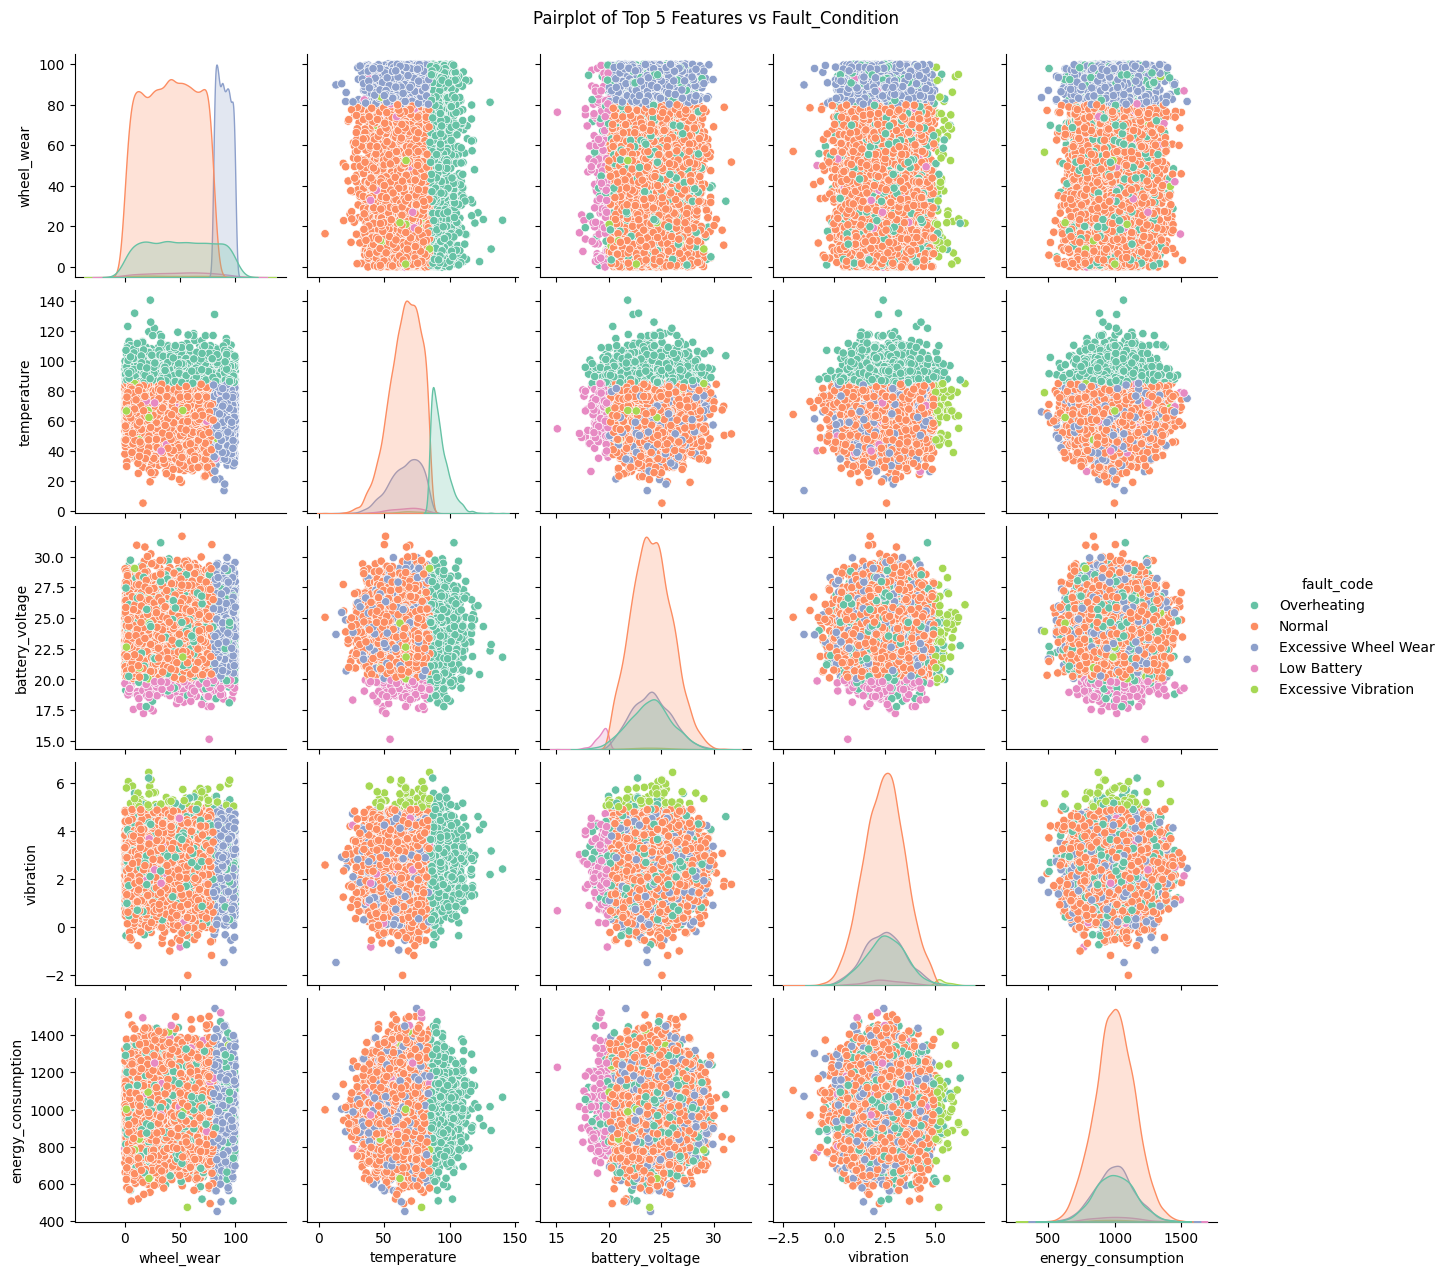

In [33]:
sns.pairplot(df[top5_features + ['fault_code']], hue='fault_code', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Top 5 Features vs Fault_Condition", y=1.02)
plt.show()

/tmp/ipython-input-34-2693999501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fault_code', y=feature, data=df, palette='Spectral')


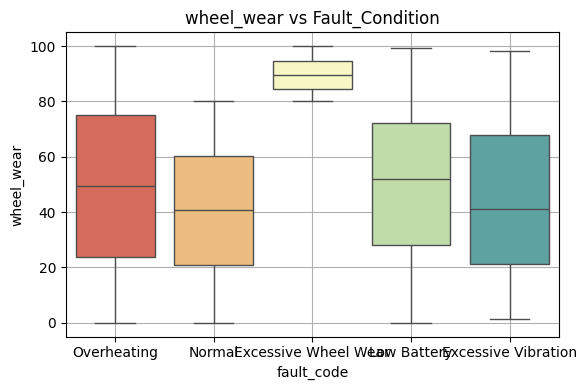

/tmp/ipython-input-34-2693999501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fault_code', y=feature, data=df, palette='Spectral')


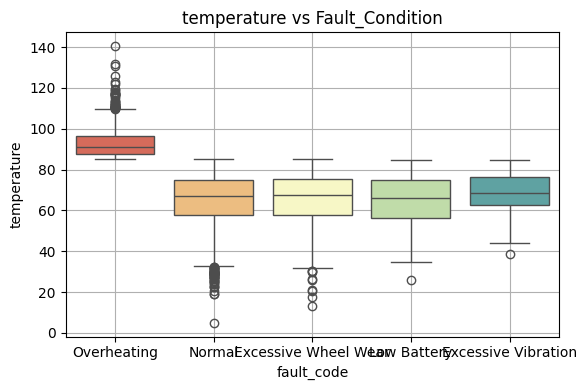

/tmp/ipython-input-34-2693999501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fault_code', y=feature, data=df, palette='Spectral')


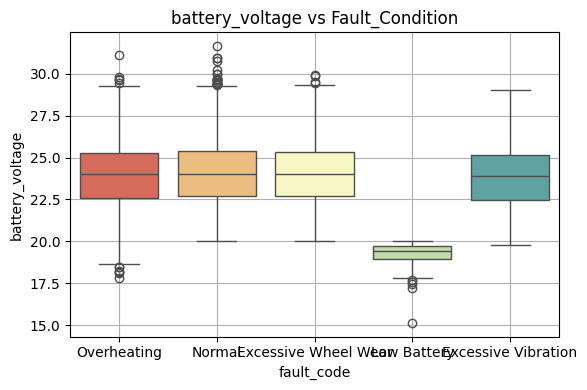

/tmp/ipython-input-34-2693999501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fault_code', y=feature, data=df, palette='Spectral')


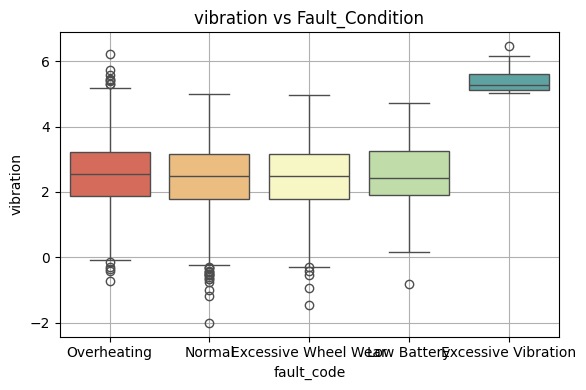

/tmp/ipython-input-34-2693999501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fault_code', y=feature, data=df, palette='Spectral')


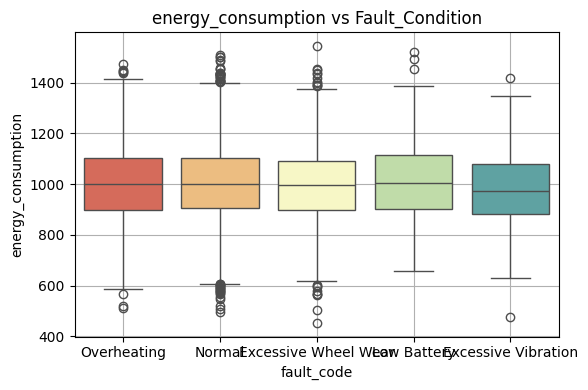

In [34]:
for feature in top5_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='fault_code', y=feature, data=df, palette='Spectral')
    plt.title(f"{feature} vs Fault_Condition")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

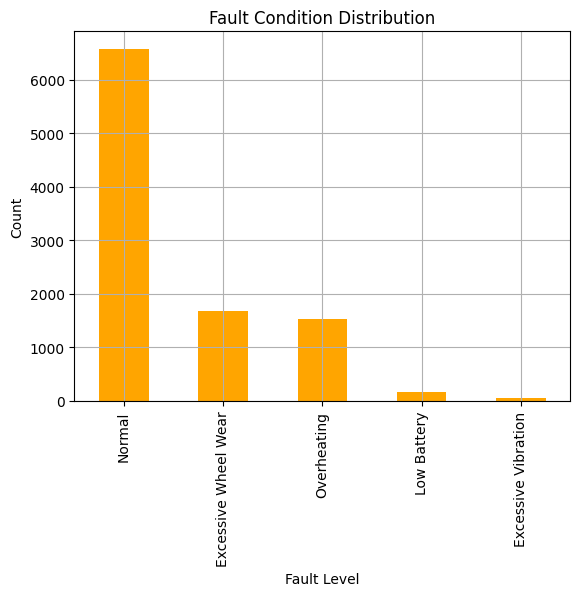

In [35]:
df['fault_code'].value_counts().plot(kind='bar', color='orange')
plt.title("Fault Condition Distribution")
plt.xlabel("Fault Level")
plt.ylabel("Count")
plt.grid(True)
plt.show()

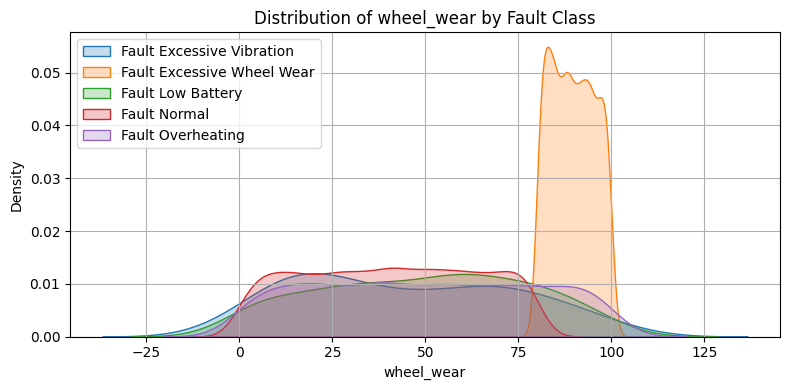

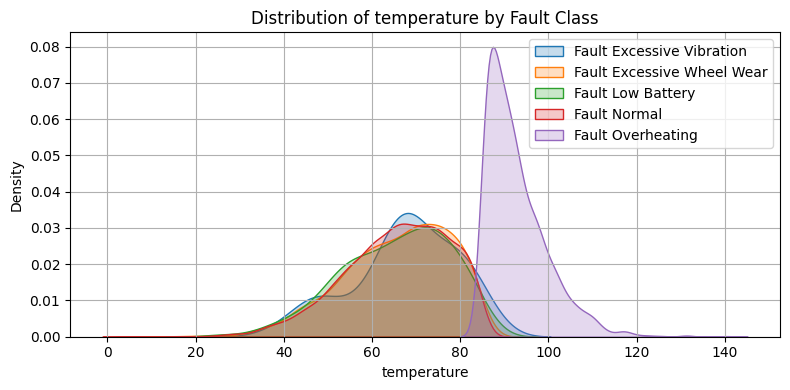

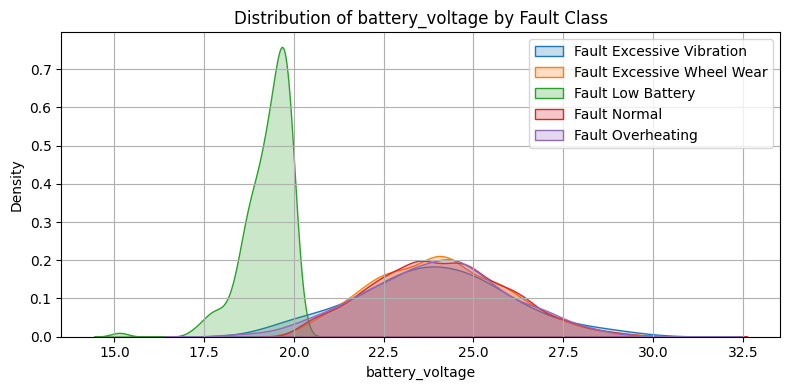

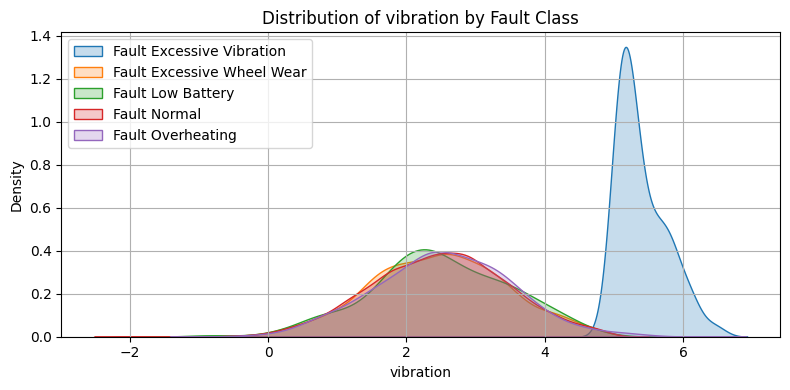

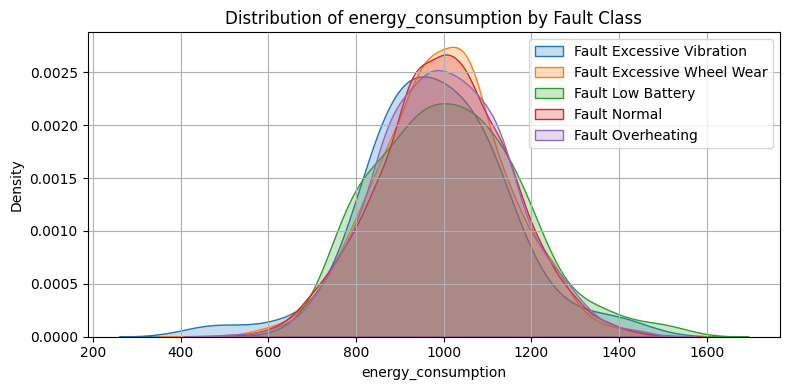

In [36]:
for feature in top5_features:
    plt.figure(figsize=(8, 4))
    for cls in sorted(df['fault_code'].unique()):
        sns.kdeplot(df[df['fault_code'] == cls][feature], label=f'Fault {cls}', fill=True)
    plt.title(f'Distribution of {feature} by Fault Class')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_top5, X_top5, y, cv=skf, scoring='f1_macro')
print("Cross-validated F1 scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

Cross-validated F1 scores: [0.98757764 1.         0.99833701 0.99356102 1.        ]
Mean F1 Score: 0.9958951331140249


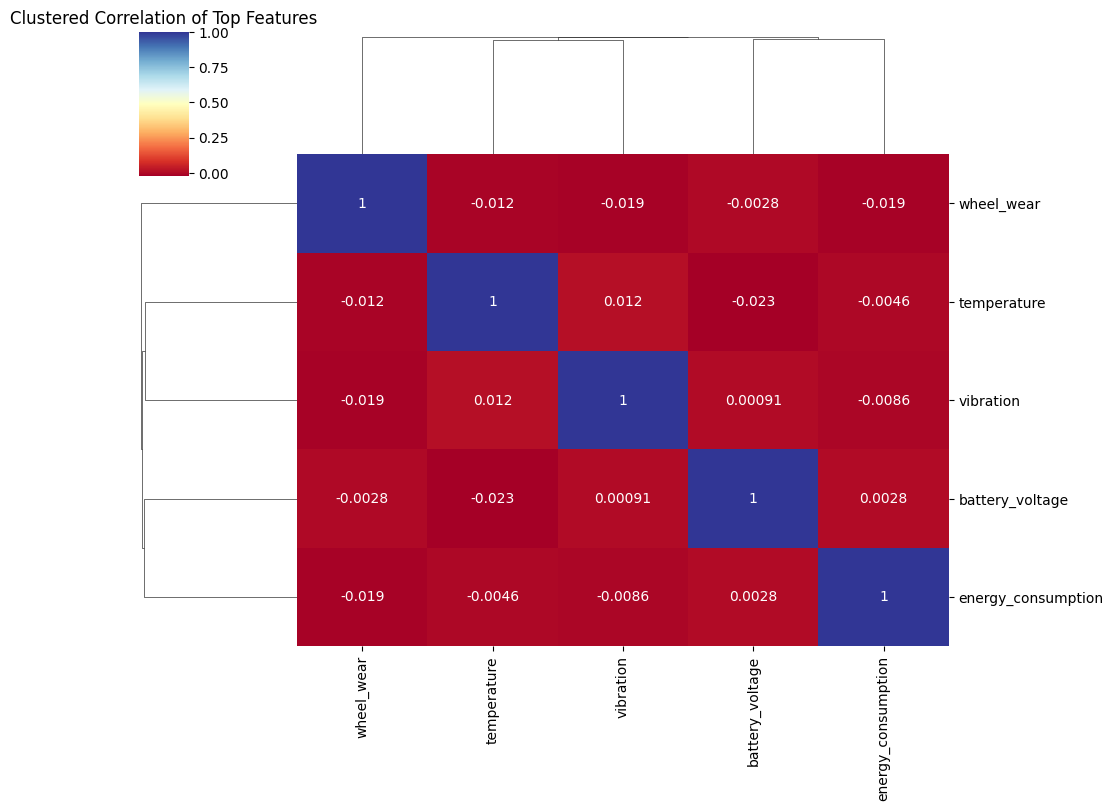

In [38]:
numerical_top5_df = df[top5_features]
sns.clustermap(numerical_top5_df.corr(), annot=True, cmap="RdYlBu", figsize=(10, 8))
plt.title("Clustered Correlation of Top Features")
plt.show()